In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
import pandas as pd
sns.set(style="darkgrid")
from matplotlib import gridspec
import matplotlib.cm as cm
import warnings
import os.path as osp
from mpl_toolkits import mplot3d
import pickle as pkl

warnings.filterwarnings(action='once')
print(sns.__version__, pd.__version__, np.__version__, matplotlib.__version__)

0.9.0 0.23.4 1.15.1 3.0.0


In [ ]:
root_path = './'
it=0
data_path = osp.join(root_path)
labels = ['background', 'self (static and dynamic)', 'other (dynamic) agent']
threshold = 2000

In [3]:
with open(osp.join(data_path, 'custom_trajectories.pkl'), 'rb') as f:
        raw = pkl.load(f)
data = np.array(raw[it]['data'])

timesteps_per_class = int(len(data) / 3)
colors = cm.tab10(np.arange(len(data)))

/home/dlrc1/.virtualenvs/dlrc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


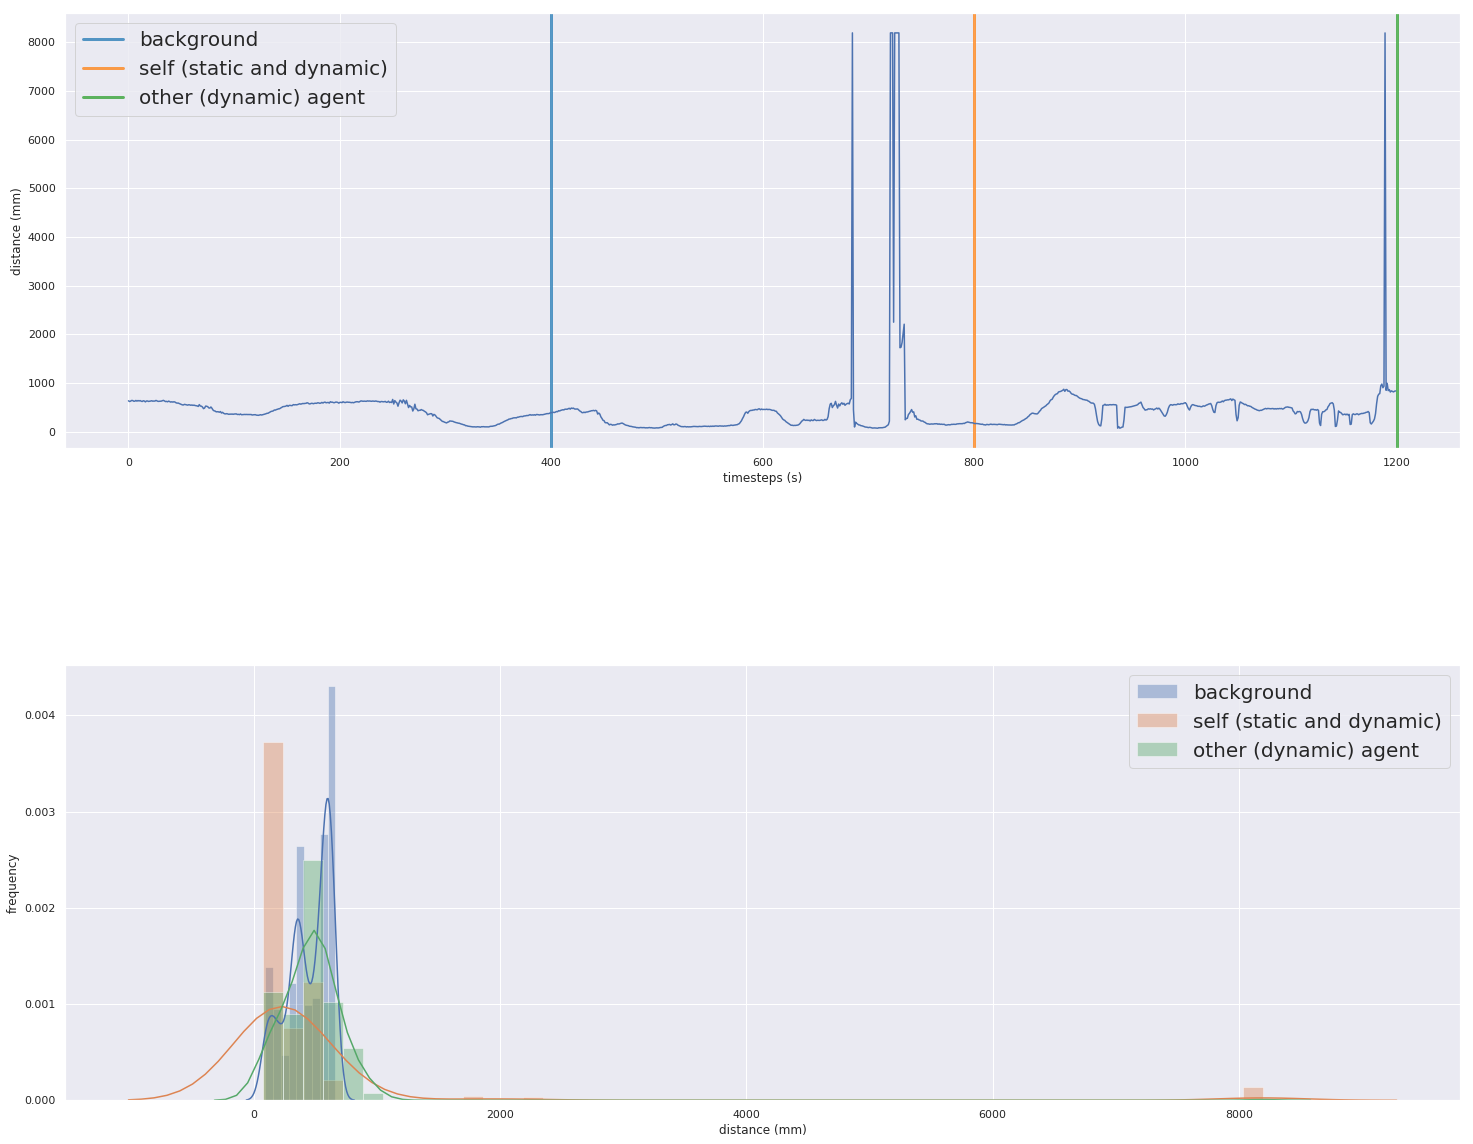

Measurements lidar: 3 (frequency: 14.1849 Hz) without thresholding


In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 20))
fig.subplots_adjust(hspace=0.5)

for i in range(len(labels)):
    ax1.axvline(x=i*timesteps_per_class+timesteps_per_class, ymin=0, ymax=np.max(data), color=colors[i], linewidth=3, alpha=0.75, label=labels[i])
ax1.set_xlabel('timesteps (s)')
ax1.set_ylabel('distance (mm)')
ax1.plot(data)
ax1.legend(loc=2, fontsize=20)

for i in range(len(labels)):
    sns.distplot(data[i*timesteps_per_class:i*timesteps_per_class+timesteps_per_class], ax=ax2, label=labels[i])
    ax2.legend(loc=1, fontsize=20)
ax2.set_xlabel('distance (mm)')
ax2.set_ylabel('frequency')
plt.savefig('measurements_lidar{}_without_thresh.png'.format(raw[it]['lidar']), format='png')
plt.show()
print('Measurements lidar: {} (frequency: {:.4f} Hz) without thresholding'.format(raw[it]['lidar'], raw[it]['frequency']))

In [5]:
data[data > threshold] = threshold

/home/dlrc1/.virtualenvs/dlrc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


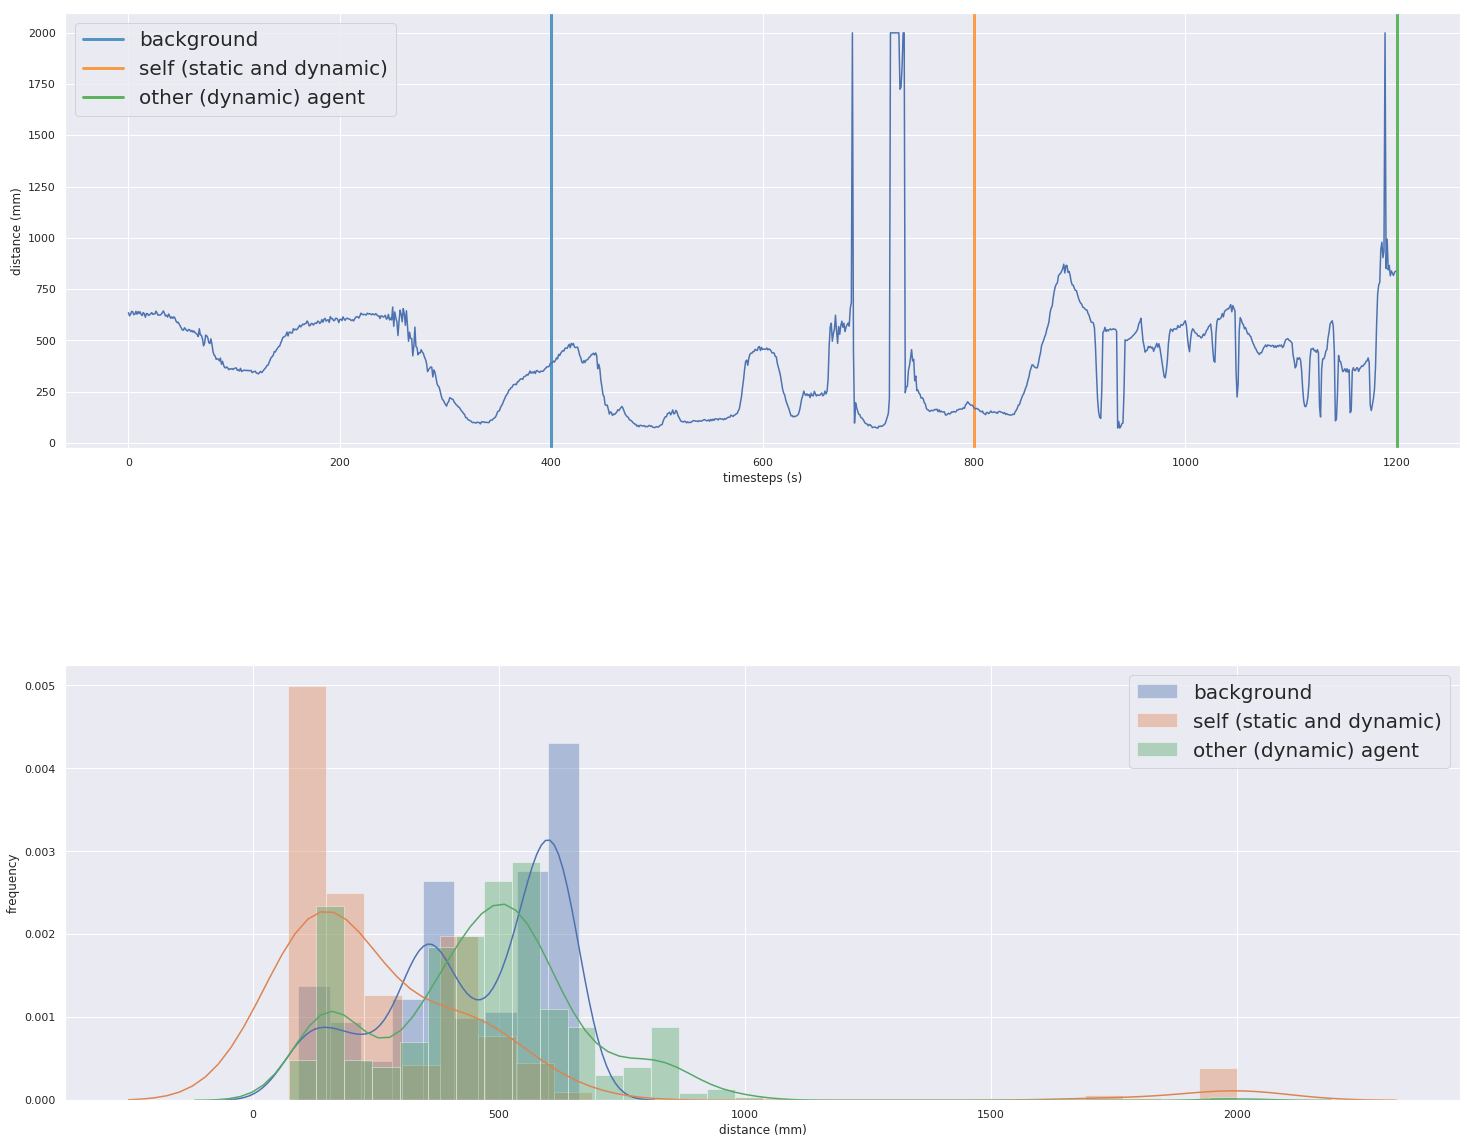

Measurements lidar: 3 (frequency: 14.1849 Hz) with thresholding at 2000


In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 20))
fig.subplots_adjust(hspace=0.5)

for i in range(len(labels)):
    ax1.axvline(x=i*timesteps_per_class+timesteps_per_class, ymin=0, ymax=np.max(data), color=colors[i], linewidth=3, alpha=0.75, label=labels[i])
ax1.set_xlabel('timesteps (s)')
ax1.set_ylabel('distance (mm)')
ax1.plot(data)
ax1.legend(loc=2, fontsize=20)

for i in range(len(labels)):
    sns.distplot(data[i*timesteps_per_class:i*timesteps_per_class+timesteps_per_class], ax=ax2, label=labels[i])
    ax2.legend(loc=1, fontsize=20)
ax2.set_xlabel('distance (mm)')
ax2.set_ylabel('frequency')
plt.savefig('measurements_lidar{}_with_thresh.png'.format(raw[it]['lidar']), format='png')
plt.show()
print('Measurements lidar: {} (frequency: {:.4f} Hz) with thresholding at {}'.format(raw[it]['lidar'], raw[it]['frequency'], threshold))